<a href="https://colab.research.google.com/github/TheAnjaliRai/Deep_Learning/blob/main/Implementation_of_ANN_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Implementation of ANN using Keras**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [ ]:
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.17.0
Keras Version 3.4.1


In [ ]:
os.getcwd()

'/content'

**GPU /CPU CHECK**

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
check_list = ['GPU' , 'CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available")
  else:
    print(f"{device} is not available")


GPU is not available
CPU is available


Creating a simple classifier using Keras on MNIST data
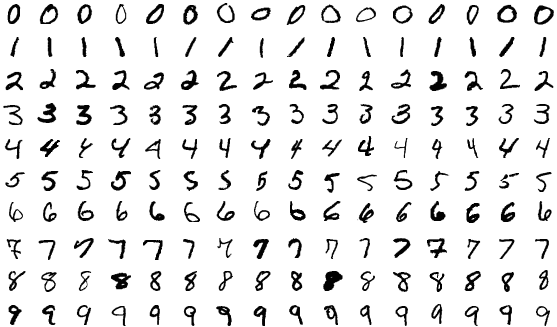

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [ ]:
(X_train_full , y_train_full) , (X_test , y_test)  = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train_full.shape  #60000 images , 28 pixels tall , 28 pixels wide

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
X_train_full[0].shape

(28, 28)

In [ ]:
# creating  a validation data set from the full training data
# scaling the data between 0 to 1 by dividing it by 255 as its an unsigned data
# between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.


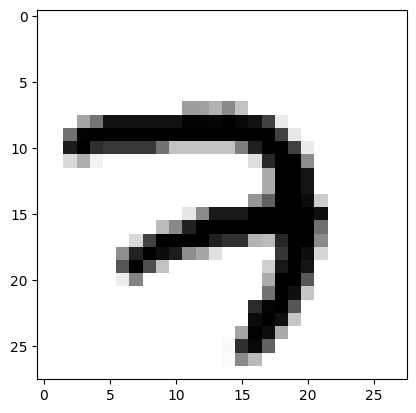

In [ ]:
plt.imshow(X_train[0] , cmap = "binary")
plt.show()

<Axes: >

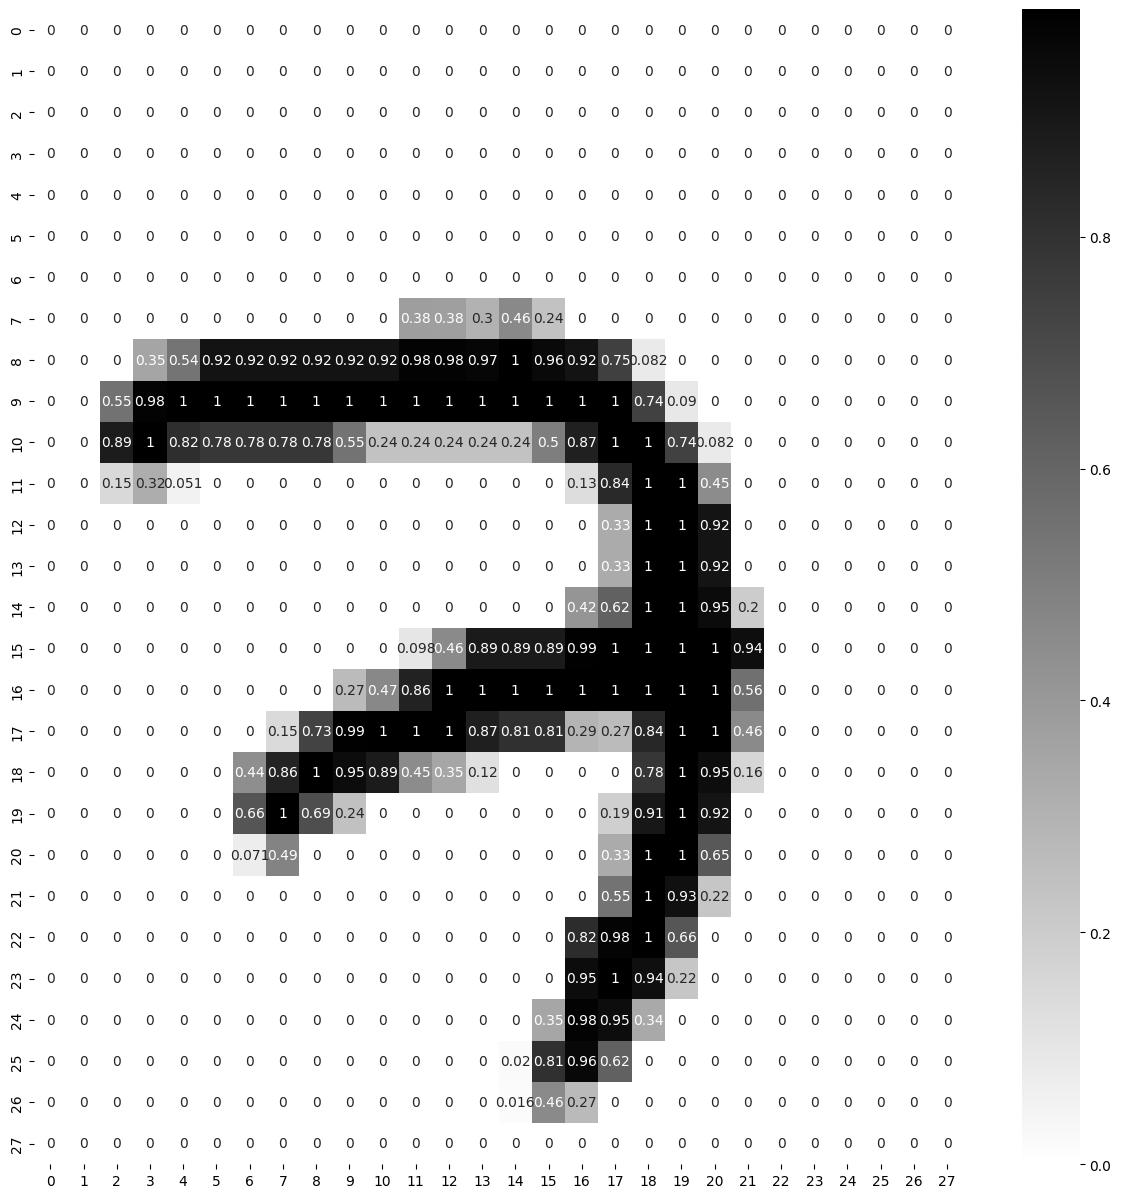

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(X_train[0], annot = True , cmap = "binary")

In [ ]:
# input = 28*28 = 784
# output = {0,1,2,3,4,5,6,7,8,9}

**Architechture used**


1. input layer = 784
2. hidden layer 1 = 300
3. hidden layer 2 = 100
4. output layer = 10

In [ ]:
# Creating layers of ANN - METHOD 1
LAYERS = [tf.keras.layers.Flatten(input_shape=[28,28],name = "inputLayer"),
          tf.keras.layers.Dense(300 , activation = "relu" , name = "hiddenLayer1"),
          tf.keras.layers.Dense(100 , activation = "relu" , name = "hiddenLayer2"),
          tf.keras.layers.Dense(10 , activation = "softmax" , name = "outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# METHOD 2
# from keras.models import Sequential
# from keras.layers import Dense , Flatten
# model = Sequential()
# model.add(Flatten(input_shape = [28,28]))
# model.add(Dense(300 , activation = "relu"))
# model.add(Dense(100 , activation = "relu"))
# model.add(Dense(10 , activation = "softmax"))


In [ ]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [ ]:
model_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
784*300+300

235500

In [ ]:
300*100+100

30100

In [ ]:
100*10+10

1010

In [ ]:
# firstlayer * second layer + bias
784*300+300 ,  300*100+100 , 100*10+10

(235500, 30100, 1010)

In [ ]:
# total parametrs to be trained
sum((235500 ,30100,1010))

266610

In [ ]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [ ]:
weights , biases = hidden1.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
loss_function = "sparse_categorical_crossentropy"
optimizer = "SGD"
metrics = ["accuracy"]

model_clf.compile(loss=loss_function, optimizer=optimizer,metrics = metrics )

In [ ]:
# training
epochs = 10
validation_Set = (X_valid , y_valid)
history = model_clf.fit(X_train , y_train , epochs = epochs,
                        validation_data = validation_Set , batch_size = 32)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7321 - loss: 1.0297 - val_accuracy: 0.9130 - val_loss: 0.3094
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9146 - loss: 0.3015 - val_accuracy: 0.9336 - val_loss: 0.2384
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9320 - loss: 0.2382 - val_accuracy: 0.9440 - val_loss: 0.2005
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9423 - loss: 0.2021 - val_accuracy: 0.9514 - val_loss: 0.1794
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9500 - loss: 0.1763 - val_accuracy: 0.9568 - val_loss: 0.1616
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9561 - loss: 0.1542 - val_accuracy: 0.9590 - val_loss: 0.1485
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9606 - loss: 0.1383 - val_accuracy: 0.9638 - val_loss: 0.1310
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9643 - loss: 0.1271 

In [ ]:
history.params

{'verbose': 'auto', 'epochs': 10, 'steps': 1719}

In [ ]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.842073,0.609756,0.9130,0.309388
1,0.918600,0.285844,0.9336,0.238415
2,0.934073,0.232628,0.9440,0.200520
3,0.944055,0.198397,0.9514,0.179350
4,0.950345,0.172756,0.9568,0.161635
5,0.956636,0.152462,0.9590,0.148502
6,0.961345,0.136797,0.9638,0.130977
7,0.964745,0.123601,0.9666,0.122155
8,0.968164,0.112679,0.9684,0.114500
9,0.970618,0.103417,0.9684,0.108338


<Axes: >

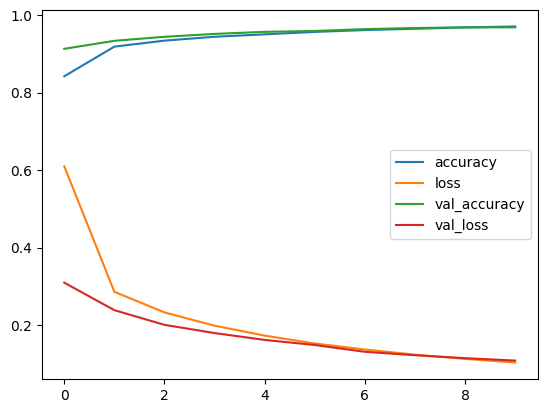

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0912 - loss: 2.3554


[2.3613991737365723, 0.08919999748468399]

CHECK TEST DATA

In [ ]:
x_new = X_test[:5]

In [ ]:
actual = y_test[:5]
actual

array([7, 2, 1, 0, 4], dtype=uint8)

<Axes: >

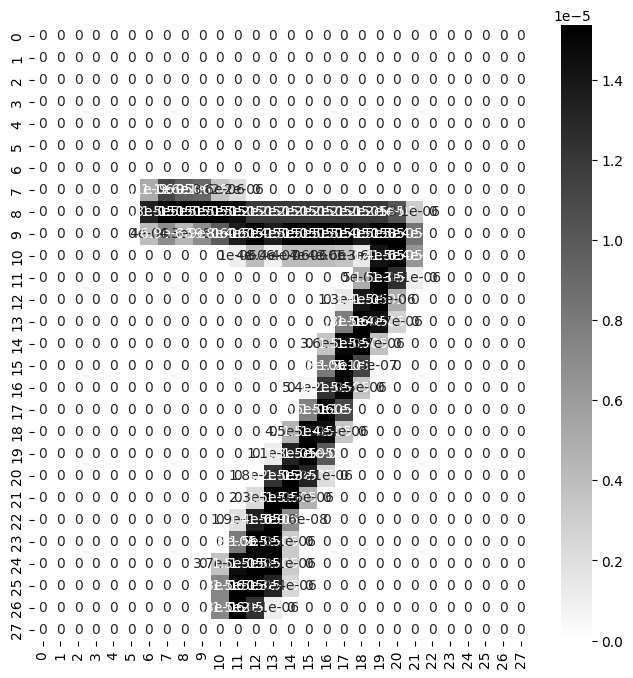

In [ ]:
plt.figure(figsize = (8,8))
sns.heatmap(X_test[0],annot = True , cmap = 'binary')

In [ ]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.064, 0.135, 0.083, 0.054, 0.105, 0.167, 0.082, 0.141, 0.072,
        0.095],
       [0.064, 0.135, 0.083, 0.054, 0.105, 0.167, 0.082, 0.141, 0.072,
        0.095],
       [0.064, 0.135, 0.083, 0.054, 0.105, 0.167, 0.082, 0.141, 0.072,
        0.095],
       [0.064, 0.135, 0.083, 0.054, 0.105, 0.167, 0.082, 0.141, 0.072,
        0.095],
       [0.064, 0.135, 0.083, 0.054, 0.105, 0.167, 0.082, 0.141, 0.072,
        0.095]], dtype=float32)

In [ ]:
y_pred = np.argmax(y_prob , axis = -1)

In [ ]:
y_pred

array([5, 5, 5, 5, 5])

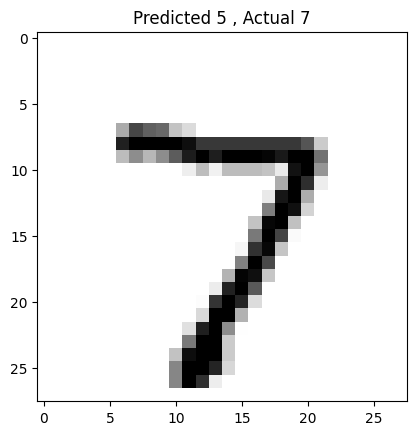

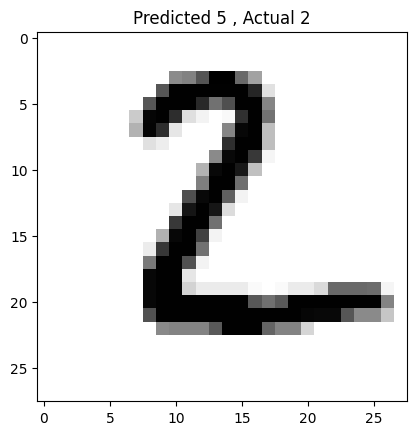

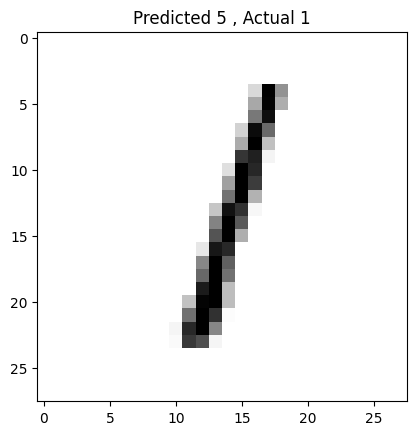

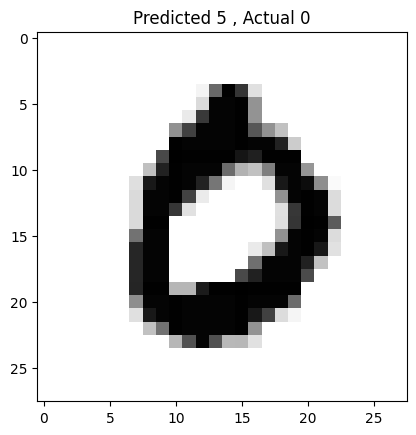

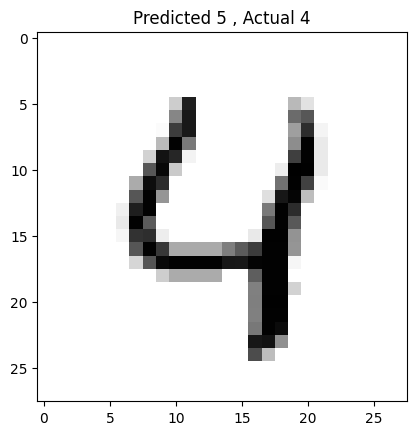

In [ ]:
for data , pred , actual_data in zip(x_new , y_pred , actual):
  plt.imshow(data , cmap = "binary")
  plt.title(f"Predicted {pred} , Actual {actual_data}")
  plt.show()